In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from ridge import RidgeRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Now Lets test on the olympic dataset

In [2]:
df = pd.read_csv("Olympic.csv")
# We leave 2 points for testing as data is scarce we can't affort leaving out too many points, otherwise the model wouldn't be able to capture
# the pattern in the data
train_df = df[:-2]
test_df = df[-2:]

X_train_valid = train_df[['Year']].values
y_train_valid = train_df['Time'].values
X_test = test_df[['Year']].values
y_test = test_df['Time'].values

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_valid)
X_test_scaled = scaler.transform(X_test)
# we found this value of alpha by setting the polynomial features to one in the next cell code and doing grid search
model =  RidgeRegression(alpha=0.8)


tscv = TimeSeriesSplit(n_splits=5) 
mse_scores = []

for train_index, valid_index in tscv.split(X_train_scaled):
    X_train, X_valid = X_train_scaled[train_index], X_train_scaled[valid_index]
    y_train, y_valid = y_train_valid[train_index], y_train_valid[valid_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    mse = mean_squared_error(y_valid, predictions)
    mse_scores.append(mse)

average_mse = sum(mse_scores) / len(mse_scores)
print("MSE's per fold:",mse_scores)
print("Average MSE across all folds:", average_mse)

MSE's per fold: [0.075374647428249, 0.044053871911399214, 0.04678182458500112, 0.011820186253464243, 0.011524888859857293]
Average MSE across all folds: 0.03791108380759417


In [3]:
X_test = test_df[['Year']].values
y_test = test_df['Time'].values
model.fit(X_train_scaled, y_train_valid)
train_predictions=model.predict(X_train_scaled)
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
mse

0.0639490444919544

In [4]:
#Scikit learn's model
model = Ridge(alpha=0.8)
model.fit(X_train_scaled, y_train_valid)

predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
mse

0.0639490444919544

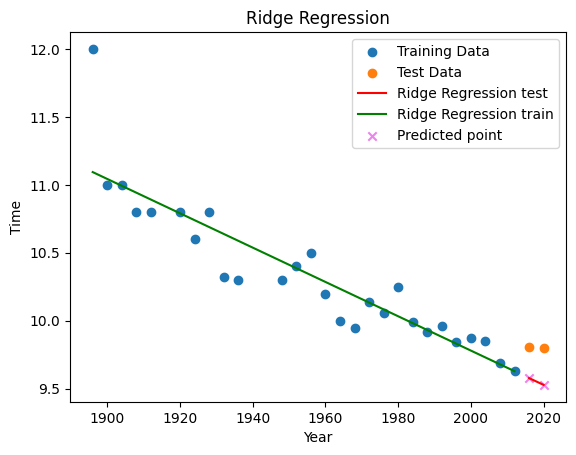

In [5]:
plt.scatter(X_train_valid, y_train_valid, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, predictions, color='red', label='Ridge Regression test')
plt.plot(X_train_valid, train_predictions, color='green', label='Ridge Regression train')
plt.scatter(X_test, predictions, color='violet', marker='x', label='Predicted point')



plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Ridge Regression')
plt.legend()
plt.show()

### Now lets do some feature transaformation so that we could have a better model 

In [6]:
X = df[['Year']].values
y = df['Time'].values
train_df = df[:-2]
test_df = df[-2:]

X_train_valid = train_df[['Year']].values
y_train_valid = train_df['Time'].values
X_test = test_df[['Year']].values
y_test = test_df['Time'].values


scaler = StandardScaler()
X_train_valid_scaled = scaler.fit_transform(X_train_valid)
poly = PolynomialFeatures(degree=2)
X_train_valid_poly = poly.fit_transform(X_train_valid_scaled)


# Grid search to find alpha
alpha_range = np.arange(0.1, 10.1, 0.1)  
best_alpha = None
best_mse = float('inf')

for alpha in alpha_range:
        model = RidgeRegression(alpha=alpha)

        tscv = TimeSeriesSplit(n_splits=5)
        mse_scores = []

        for train_index, valid_index in tscv.split(X_train_valid_poly):
            X_train, X_valid = X_train_valid_poly[train_index], X_train_valid_poly[valid_index]
            y_train, y_valid = y_train_valid[train_index], y_train_valid[valid_index]

            model.fit(X_train, y_train)
            predictions = model.predict(X_valid)


            mse = mean_squared_error(y_valid, predictions)
            mse_scores.append(mse)

        average_mse = sum(mse_scores) / len(mse_scores)

        if average_mse < best_mse:
            best_mse = average_mse
            best_alpha = alpha

print(f"Best Alpha: {best_alpha}")
print(f"Best Average MSE: {best_mse}")


Best Alpha: 0.7000000000000001
Best Average MSE: 0.06364962337477517


In [10]:
model = RidgeRegression(alpha=0.7)
poly = PolynomialFeatures(degree=2)
X_train_valid_poly = poly.fit_transform(X_train_valid_scaled)
X_test_scaled=scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

# Final evaluation on the test set
model.fit(X_train_valid_poly, y_train_valid)
final_predictions = model.predict(X_test_poly)
final_mse = mean_squared_error(y_test, final_predictions)
print("Final MSE on test set:", final_mse)

Final MSE on test set: 6.543853344126158e-06


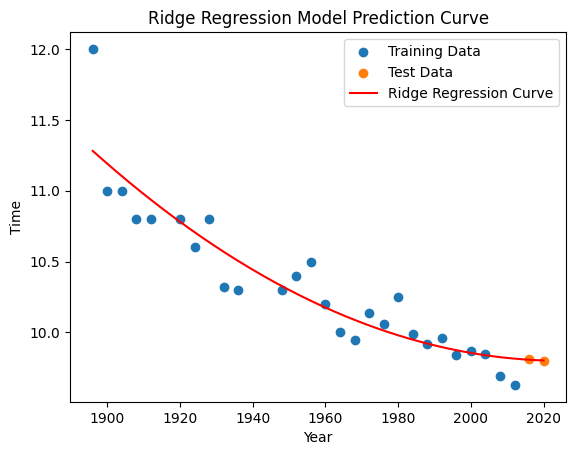

In [8]:
year_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
year_range_scaled = scaler.transform(year_range)
year_range_poly = poly.transform(year_range_scaled)

predictions_range = model.predict(year_range_poly)


plt.scatter(X_train_valid, y_train_valid, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(year_range, predictions_range, color='red', label='Ridge Regression Curve')

plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Ridge Regression Model Prediction Curve')
plt.legend()
plt.show()
